# 直方图均衡化

包导入

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

lenna_path = '../resource/image/lenna.png'
lenna_color = cv2.imread('../resource/image/lenna.png', 1)
lenna_gray = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2GRAY)

## 获取图像直方图

### 方式一

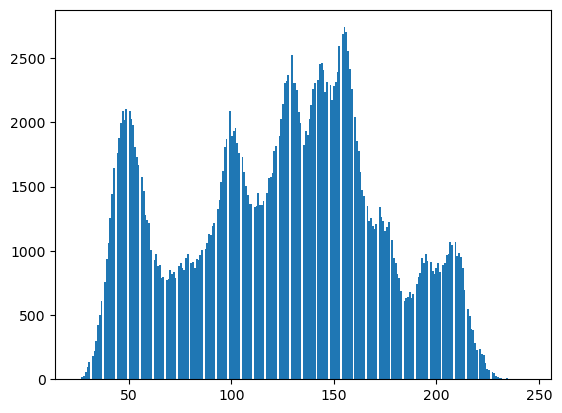

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

'''
calcHist—计算图像直方图
函数原型：calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None)
images：图像矩阵，例如：[image]
channels：通道数，例如：0
mask：掩膜，一般为：None
histSize：直方图大小，一般等于灰度级数
ranges：横轴范围
'''

# 灰度图像直方图
# 获取灰度图像
plt.figure()
plt.hist(lenna_gray.ravel(), 256)
plt.show()

### 方式二

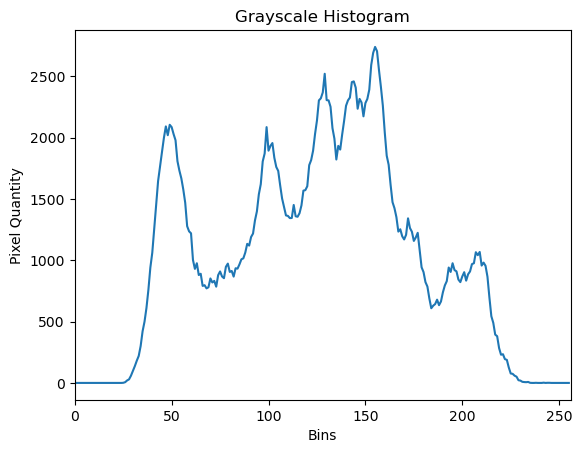

In [30]:
hist = cv2.calcHist([lenna_gray], [0], None, [256], [0, 256])
plt.figure()  #新建一个图像
plt.title("Grayscale Histogram")
plt.xlabel("Bins")  #X轴标签
plt.ylabel("Pixel Quantity")  #Y轴标签
plt.plot(hist)
plt.xlim([0, 256])  #设置x坐标轴范围
plt.show()

## 彩色图像直方图

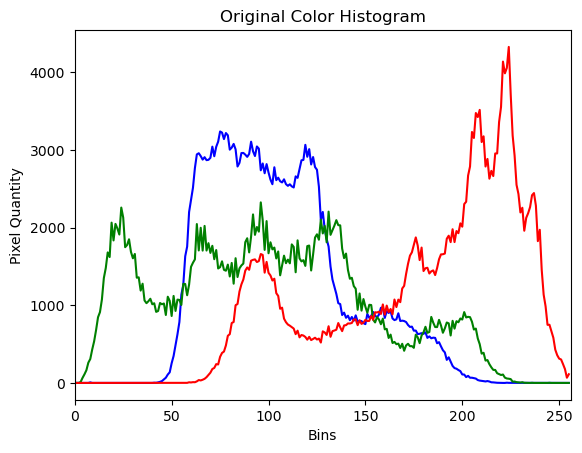

In [10]:
# 彩色直方图展示
def color_hist_paint(color_img):
    # 创建一个3行3列的图形，并设置标题和x轴和y轴标签
    channels = cv2.split(color_img)
    colores = ("b", "g", "r")
    plt.figure()
    plt.title("Original Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Pixel Quantity")
    # 遍历每个通道，计算每个通道的直方图，并绘制到图形上
    for (channel, color) in zip(channels, colores):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()


color_hist_paint(lenna_color)

## 灰度图像直方图均衡化

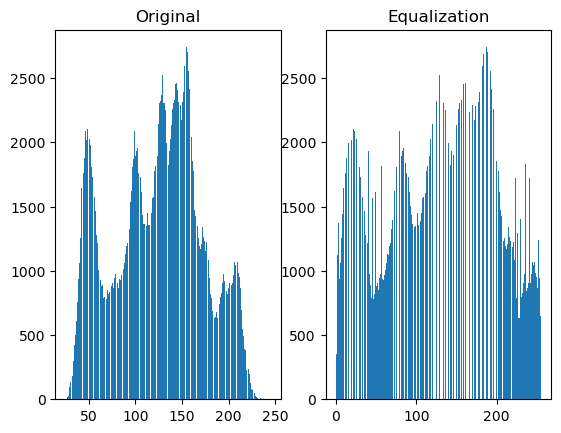

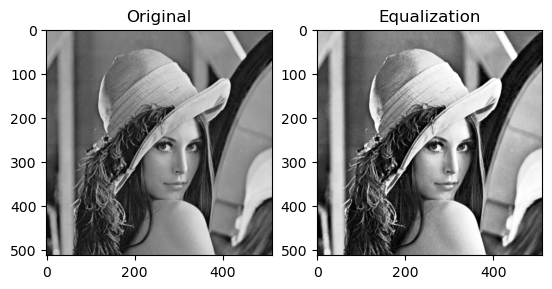

In [15]:
def histo_equal_gry(img):
    # Histogram Equalization
    # Normalized CDF ~~ (Cumulative Frequency * Maximum Pixel Value) / Total Number of Pixels
    dst = cv2.equalizeHist(img)

    # Histogram
    hist_balance = cv2.calcHist([dst], [0], None, [256], [0, 256])

    plt.figure()
    plt.subplot(121), plt.hist(img.ravel(), bins=256), plt.title('Original')
    plt.subplot(122), plt.hist(dst.ravel(), bins=256), plt.title('Equalization')
    plt.show()

    plt.figure()
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Equalization')
    plt.show()


histo_equal_gry(lenna_gray)

## 彩色图像直方图均衡化

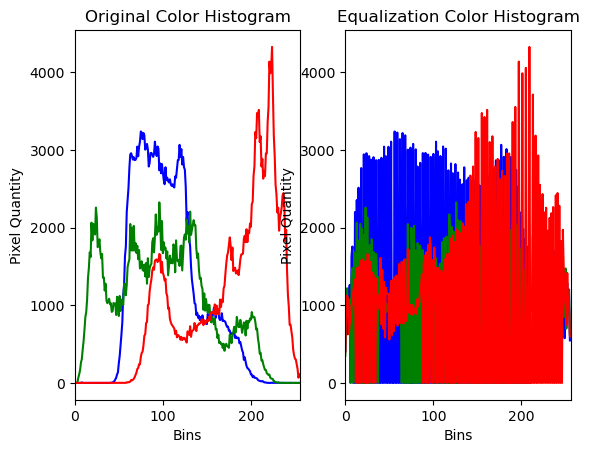

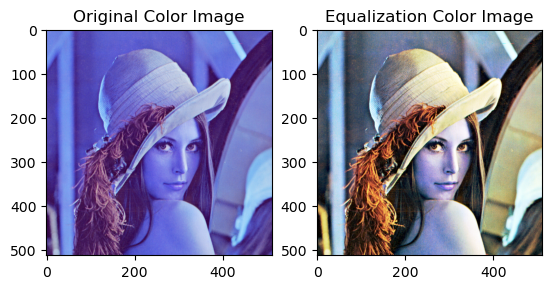

In [12]:
def show_diff_color_hist(img, mrg):
    # 创建一个3行3列的图形，并设置标题和x轴和y轴标签
    channels = cv2.split(img)
    colores = ("b", "g", "r")
    plt.figure()
    plt.subplot(121)
    plt.title("Original Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Pixel Quantity")
    # 遍历每个通道，计算每个通道的直方图，并绘制到图形上
    for (channel, color) in zip(channels, colores):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    channels2 = cv2.split(mrg)
    colores2 = ("b", "g", "r")
    plt.subplot(122)
    plt.title("Equalization Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Pixel Quantity")
    # 遍历每个通道，计算每个通道的直方图，并绘制到图形上
    for (channel, color) in zip(channels2, colores2):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()


def histo_equal_clr(img):
    # Histogram Equalization
    # Split the channels
    (b, g, r) = cv2.split(img)
    b_hist = cv2.equalizeHist(b)
    g_hist = cv2.equalizeHist(g)
    r_hist = cv2.equalizeHist(r)

    # Merge the channels
    mrg = cv2.merge([b_hist, g_hist, r_hist])

    # cv2.imshow("src_rgb", img)
    # cv2.imshow("dst_rgb", mrg)
    # cv2.waitKey(0)

    show_diff_color_hist(img, mrg)

    plt.figure()
    plt.subplot(121), plt.imshow(img), plt.title('Original Color Image')
    plt.subplot(122), plt.imshow(mrg), plt.title('Equalization Color Image')
    plt.show()


histo_equal_clr(lenna_color)